<a href="https://colab.research.google.com/github/Kanav-Jain/Data-Analysis---Python/blob/main/Movie%20Revenue%20Analysis/Python_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movies Dataset**
We want to analyze and find the factors which increase the Gross Revenue generated. 

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

**Importing Dataset**

In [2]:
df = pd.read_csv('/content/movies.csv')

In [12]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


After initially looking at the attributes, we can make shortlist some of them for our analysis purposes like:
1. Budget
2. Star
3. Company Name
4. Score
5. Votes

# **Data Cleaning**

**Handling Missing Data**

In [16]:
for col in df.columns:
  percent_missing = np.mean(df[col].isnull())*100
  print('{} - {:.6f}%'.format(col, percent_missing))

name - 0.000000%
rating - 1.004173%
genre - 0.000000%
year - 0.000000%
released - 0.026082%
score - 0.039124%
votes - 0.039124%
director - 0.000000%
writer - 0.039124%
star - 0.013041%
country - 0.039124%
budget - 28.312467%
gross - 2.464789%
company - 0.221701%
runtime - 0.052165%


So as we can see some of the columns have missing values in quite a few rows. Now if we fill the cells with value 0 then it will drastically hamper the result as we are going to find the correlation. So, we would drop the rows with missing values for particular columns.
we can also get the info about the data types of every columns

In [23]:
df = df.dropna(subset = ['star','budget', 'votes', 'gross', 'rating', 'released', 'score', 'runtime', 'company'])

In [24]:
#column types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


Now for our purpose, the Budget and Gross column dont need to be a float Data Type. So we are gonna change the Type to int64.



In [27]:
# Change column data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


**Dropping Duplicates**

Now we faced a problem here that a same company name can be registered in a slightly modified form mistakenly. So, we must get rid of these duplicates.



In [29]:
df['company'] = df['company'].drop_duplicates().sort_values()

# **Correlation with Gross Revenue**

Now, let's assume that the budget of the films and the company which produced the films, are mostly correlated with the gross revenue the movies generate. The more budget a movie has or the bigger the producton company is the movie revenue should also be higher. Let's check if this hypothesis is correct or not.


Now let's look at the films with the highest revenue.



In [30]:
df_sorted_gross = df.sort_values(by=['gross'],inplace = False, ascending = False)

In [31]:
df_sorted_gross.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0


In [32]:
# Lets compare Budget and Gross revenue

**Scatter Plot**

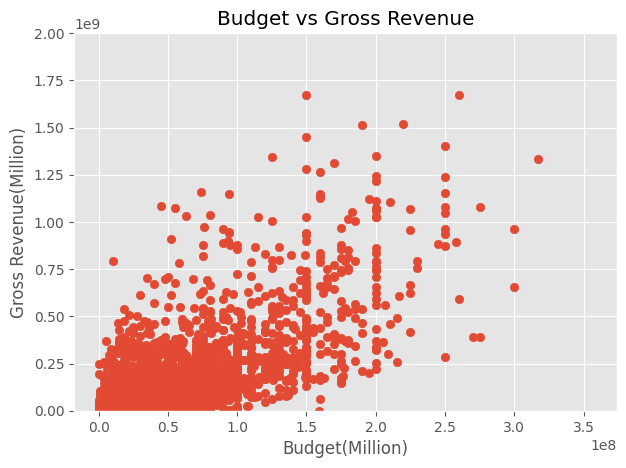

In [46]:
plt.figure(figsize = (7,5), dpi = 100)
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Revenue')
plt.ylim(0,2*10**9)
plt.xlabel('Budget(Million)')
plt.ylabel('Gross Revenue(Million)')
plt.show()

**Regression Plot**

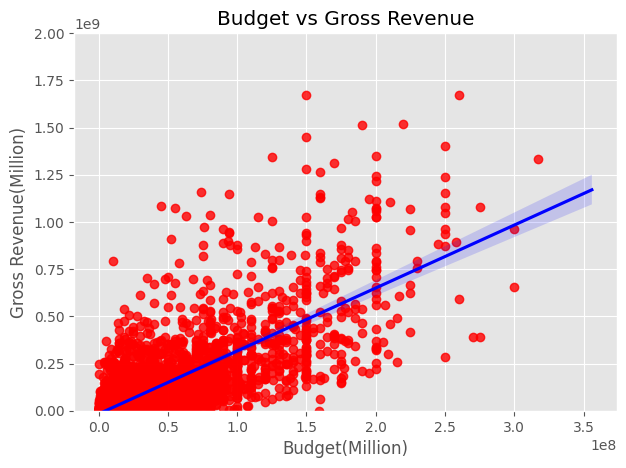

In [51]:
plt.figure(figsize = (7,5), dpi = 100)
sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Budget vs Gross Revenue')
plt.ylim(0,2*10**9)
plt.xlabel('Budget(Million)')
plt.ylabel('Gross Revenue(Million)')
plt.show()

We can clearly see Budget and Gross Revenue are higly correlated. 
Lets see how much!



**Heatmap**

Now to get the relation more clearly we will try to analyse the dependencies on other paramaters also. Here some of the column are not of int64 or float64 data type. So we can not directly include those data into the correlation heatmap. We will address this problem in a bit.



In [53]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


Thus from the table itself, we can understand that gross and budget are highly correlated only. There are different types of correlations pearson, kendall, spearman and all. Here we used the default type that is 'Pearson'. But along with that, we also can see that another parameter , 'votes' also shows high correlation with gross.



In [54]:
correlation_matrix = df.corr(method = 'pearson')

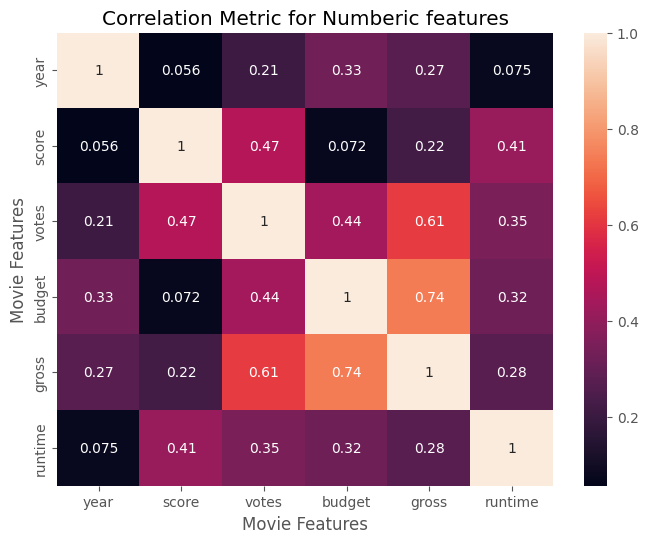

In [61]:
plt.figure(figsize = (8,6), dpi = 100)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Metric for Numberic features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Thus from this heatmap, it gets very clear that as of now, it's not only the budget that is mostly correlated with the revenue, but votes also plays a crucial role in the revenue numbers.

# **Numericization of Object Data Types**

In [62]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0


Text(220.72222222222223, 0.5, 'Movie Features')

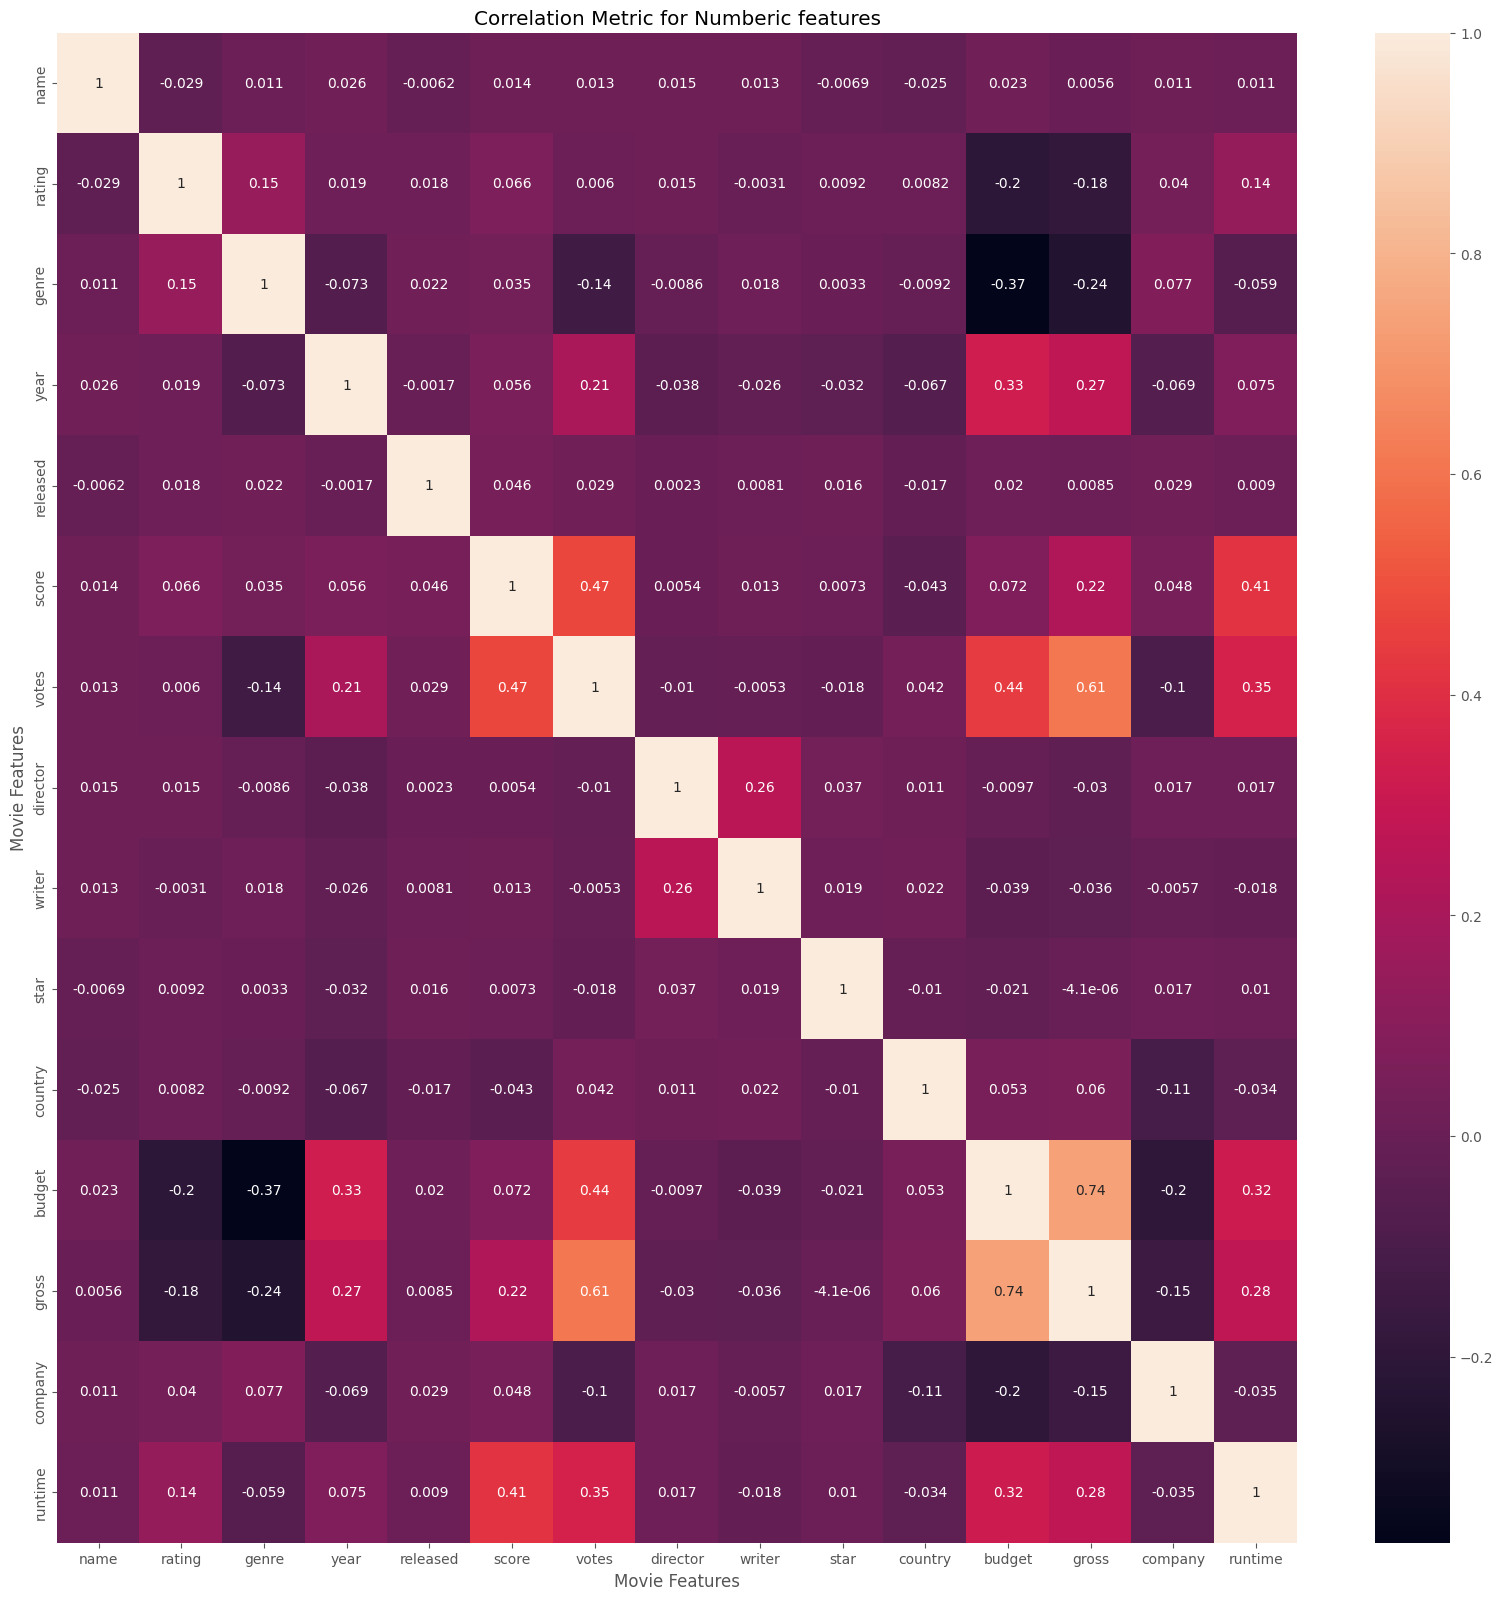

In [65]:
plt.figure(figsize = (20,20), dpi = 100)
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numberic features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

**So we can clearly see only votes and budget are highly correlated with Gross Revenue**
